# Portfolio 5

Import libraries

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline
import time

In [280]:
df = pd.read_csv('Downloads/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


As the data is result of a PCA transformation, we don't need to apply it again.

Checking for null value. There are no "Null" values, so we don't have to work on ways to replace values

In [281]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We then standardize the data

In [282]:
X = df.drop(['Class'],  axis=1)
X['Time'] = StandardScaler().fit_transform(X['Time'].values.reshape(-1,1))
X['Amount'] = StandardScaler().fit_transform(X['Amount'].values.reshape(-1,1))
y = df['Class']

The dataset is split into training and testing subset

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We check the class distribution of our dataset:

In [210]:
print('\nBalance of positive and negative classes (%):')
y_train.value_counts(normalize=True) * 100


Balance of positive and negative classes (%):


0    99.828392
1     0.171608
Name: Class, dtype: float64

The proportion between class is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using metrics like accuracy score to evaluate the model can be misleading. If the number of instances is not balanced, most classification algorithms will heavily focus on the majority class without performing any analysis of the features. As a result, it might seem like the algorithm is achieving good results when it is simply always predicting the majority class. Also, we can see with credit card fraud detection problems, misclassification errors are not desirable in general, but one type of misclassification is much worse than the other. Specifically predicting positive cases as a negative case is more harmful, more expensive, or worse in whatever way we want to measure the context of the target domain. We need to change the metrics to measure the performance of our algorithms:
- **Precision**: It gives a measure of the proportion of positive predictions that are truly positive. It indicates the reliability of a model in predicting a class of interest. Precision is basically a ratio of correctly positively labelled to all positively labelled. 
- **Recall**: It is a measure of the proportion of actual positive cases that got predicted as positive or true positive.
- **Area Under Precision Recall Curve (AUPRC)**: A precision-recall curve shows the relationship between precision (= positive predictive value) and recall (= sensitivity) for every possible cut-off. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

All models is train with a 5-fold stratified cross validation and the same hyperparameter space. The proposed system uses logistic regression to build the classifier to prevent frauds in credit card transactions. The reason behind selecting logistic regression to build the classifier is related to its efficiency of detecting frauds based on its ability to isolate the data that belong to different binary classes. Another reason for choosing logistic regression is that its training time is feasible to develop and compare different models.

## Baseline Model

In [231]:
model = LogisticRegression(random_state=0)
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
param_list = np.linspace(0.2,2,10)
param_list = np.around(param_list, decimals=4)
params = {"C": param_list}
clf = GridSearchCV(model, params, scoring='average_precision', cv = kf, n_jobs=-1).fit(X_train,y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

Done training in 86.19947576522827 seconds.


{'C': 0.2}
0.7487313867479661
0.01938208464252116


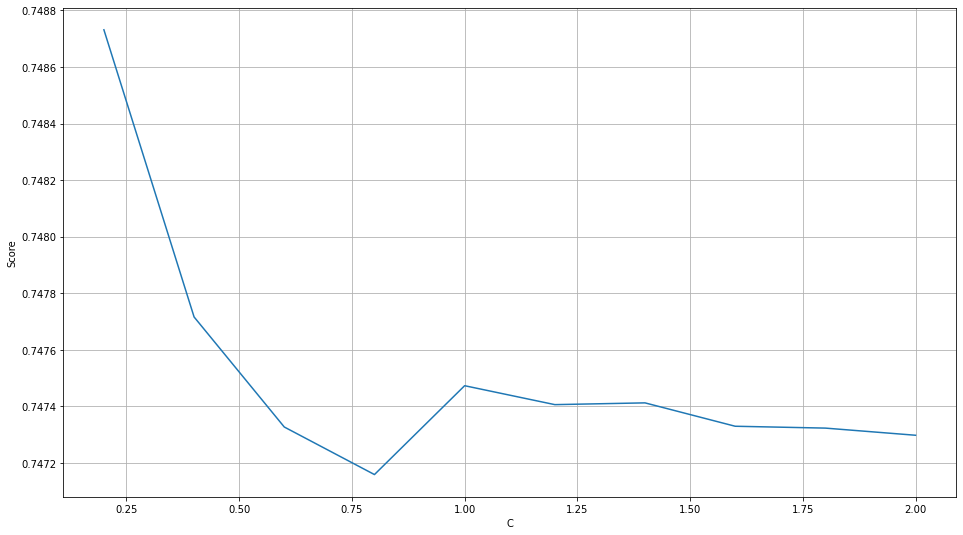

In [232]:
results = pd.DataFrame()
# collect parameter list
results['C'] = clf.cv_results_['param_C'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['C'], results['score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.grid()

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_['std_test_score'][clf.best_index_])

<ipython-input-233-f73fc93664fd>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


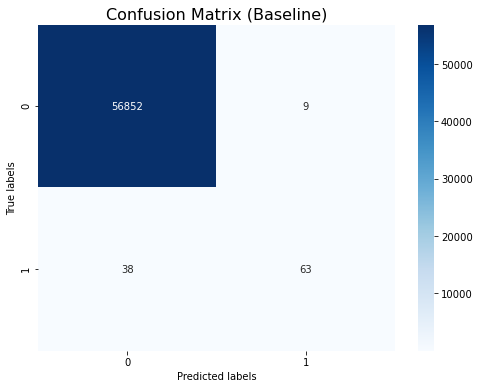

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.62      0.73       101

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC Score=0.792


In [233]:
preds = clf.best_estimator_.predict(X_test)
preds_proba =clf.predict_proba(X_test)
preds_proba = preds_proba[:, 1]

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Baseline)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

precision, recall, thresholds = precision_recall_curve(y_test, preds_proba)
AUC = auc(recall, precision)
print('AUPRC Score=%.3f' % AUC)

There are two ways to deal with the imbalance class distribution: using cost-sensitive learning methods or using sampling method

## 1. Cost-Sensitive Learning Method

Cost-sensitive learning methods try to minimize a loss function associated with a dataset. The actual costs and distribution for each kind of error are different, so these methods need to determine the weight for each class based on the data and apply that to the learning stage. A traditional method to cost-sensitive learners is shifting the bias of a machine learning algorithm towards those classes that have fewer examples in the training dataset.

In [234]:
model = LogisticRegression(class_weight='balanced', random_state=0)
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
param_list = np.linspace(0.2,2,10)
param_list = np.around(param_list, decimals=4)
params = {"C": param_list}
clf = GridSearchCV(model, params, scoring='average_precision', cv = kf, n_jobs=-1).fit(X_train,y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

Done training in 88.48612713813782 seconds.


{'C': 2.0}
0.7437234134796258
0.019278346438708092


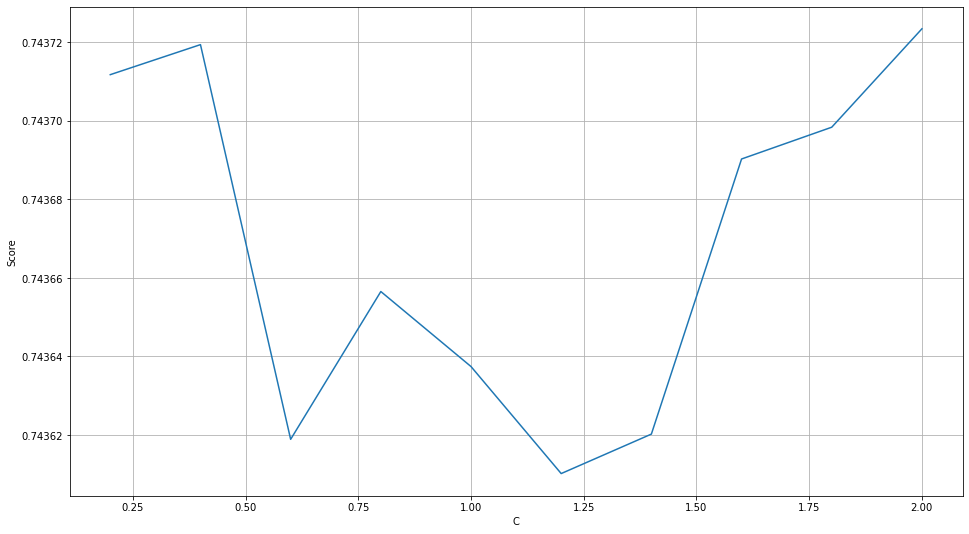

In [235]:
results = pd.DataFrame()
# collect parameter list
results['C'] = clf.cv_results_['param_C'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['C'], results['score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.grid()

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_['std_test_score'][clf.best_index_])

<ipython-input-236-520b10185e5c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


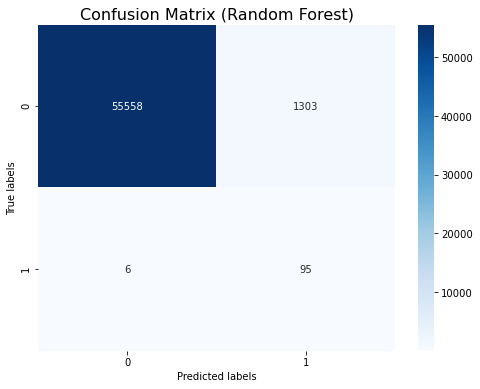

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.07      0.94      0.13       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.56     56962
weighted avg       1.00      0.98      0.99     56962

AUPRC Score=0.786


In [236]:
preds = clf.predict(X_test)
preds_proba = clf.predict_proba(X_test)
preds_proba = preds_proba[:, 1]

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

precision, recall, thresholds = precision_recall_curve(y_test, preds_proba)
AUC = auc(recall, precision)
print('AUPRC Score=%.3f' % AUC)

## 2. Sampling Methods
### 2.1. Over-Sampling

We apply SMOTE to balanced the dataset. SMOTE (Synthetic Minority Over-Sampling technique) shows good results in various applications. SMOTE adds artificially generated data which has the same character as the distribution of the minority class by over-sample the minority classes of the dataset through generating synthetic examples rather than over-sampling with replacement. Applying SMOTE to preprocess the data might improve the classification performance of the classifiers, however, it also introduces additional computational costs of data preprocessing. Oversampling also may cause classifiers to suffer from overfitting if not applied correctly.

In [195]:
imba_pipeline = make_pipeline(SMOTE(random_state=0), LogisticRegression(random_state=0))
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
param_list = np.linspace(0.2,2,10)
param_list = np.around(param_list, decimals=4)
params = {"C": param_list}
new_params = {'logisticregression__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='average_precision',n_jobs=-1, return_train_score=True)
grid_imba.fit(X_train, y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

Done training in 169.2306263446808 seconds.


{'logisticregression__C': 0.2}
0.7441570761447254
0.02095536666092816


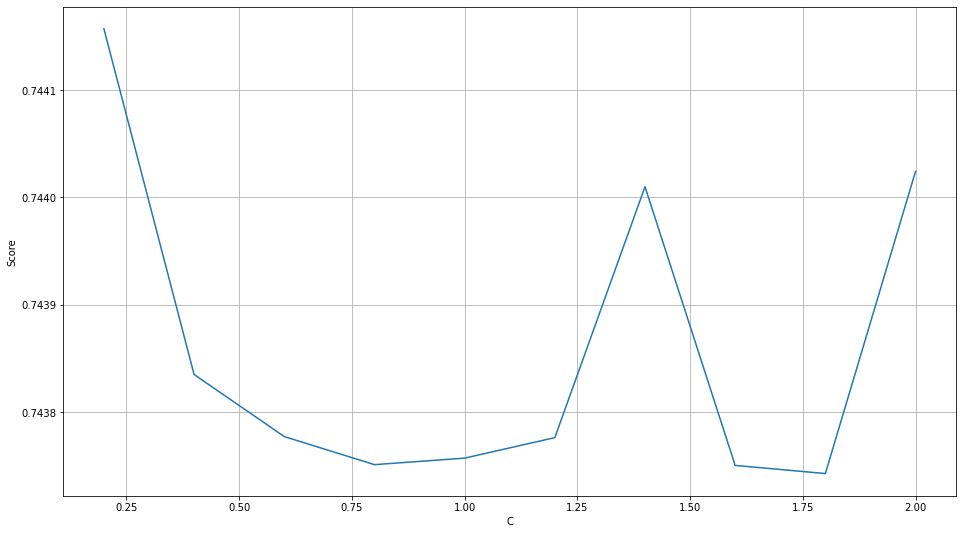

In [196]:
results = pd.DataFrame()
# collect parameter list
results['C'] = grid_imba.cv_results_['param_logisticregression__C'].data
# collect test scores
results['score'] = grid_imba.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['C'], results['score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.grid()

print(grid_imba.best_params_)
print(grid_imba.best_score_)
print(grid_imba.cv_results_['std_test_score'][clf.best_index_])

<ipython-input-197-9fa636e70310>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


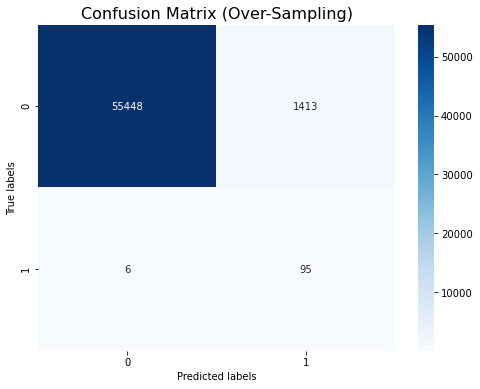

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

AUPRC Score=0.790


In [197]:
preds = grid_imba.best_estimator_.named_steps['logisticregression'].predict(X_test)
preds_proba = grid_imba.best_estimator_.named_steps['logisticregression'].predict_proba(X_test)
preds_proba = preds_proba[:, 1]

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Over-Sampling)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

precision, recall, thresholds = precision_recall_curve(y_test, preds_proba)
AUC = auc(recall, precision)
print('AUPRC Score=%.3f' % AUC)

### 2.2 Under-Sampling

Many highly skewed data sets are enormous and the size of the training set must be reduced in order for learning to be feasible. In this case, undersampling seems to be a reason-able, and valid, strategy. A limitation of this technique is that examples are removed without any concern for how useful or important they might be in determining the decision boundary between the classes. This means it is possible, or even likely, that useful information will be deleted

In [284]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=0)

In [285]:
X_rus, y_rus = undersample.fit_resample(X_train, y_train)

In [286]:
print(X_train.shape)
print(X_rus.shape)

print('\nBalance of positive and negative classes (%):')
y_rus.value_counts()

(227845, 30)
(782, 30)

Balance of positive and negative classes (%):


1    391
0    391
Name: Class, dtype: int64

In [287]:
model = LogisticRegression(random_state=0)
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
param_list = np.linspace(0.2,2,10)
param_list = np.around(param_list, decimals=4)
params = {"C": param_list}
clf = GridSearchCV(model, params, scoring='average_precision', cv = kf, n_jobs=-1).fit(X_rus,y_rus)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

Done training in 0.6379170417785645 seconds.


{'C': 1.4}
0.9846441573133479
0.004538189225888838


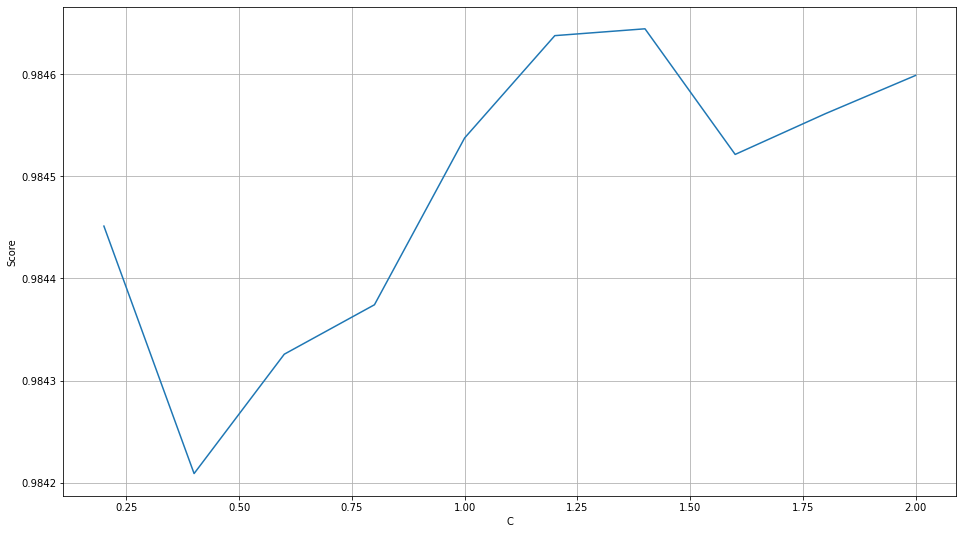

In [288]:
results = pd.DataFrame()
# collect parameter list
results['C'] = clf.cv_results_['param_C'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['C'], results['score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.grid()

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_['std_test_score'][clf.best_index_])

<ipython-input-289-6c4e6121476f>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


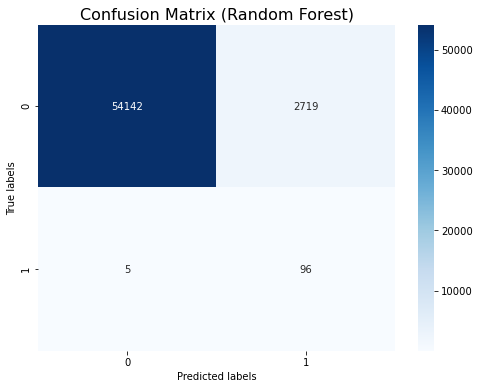

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56861
           1       0.03      0.95      0.07       101

    accuracy                           0.95     56962
   macro avg       0.52      0.95      0.52     56962
weighted avg       1.00      0.95      0.97     56962

AUPRC Score=0.706


In [289]:
preds = clf.best_estimator_.predict(X_test)
preds_proba = clf.best_estimator_.predict_proba(X_test)
preds_proba = preds_proba[:, 1]

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

precision, recall, thresholds = precision_recall_curve(y_test, preds_proba)
AUC = auc(recall, precision)
print('AUPRC Score=%.3f' % AUC)

### Comparison

The result of validation phase: the three first models have a similar performance. Undersampling method performance is much better in the validation phase.

| Model | Mean | Std |
| :-: | :-: | :-: | 
| Baseline | 0.749 | 0.019 | 
| Cost-Sensitive | 0.744 | 0.019 |
| SMOTE | 0.744 | 0.020 | 
| Under-Sampling | 0.985 | 0.004 | 

And the result of prediction. From the table below, it is evidenced that:
- All method has a similar PR-AUC score of 0.79, only undersampling have a lower score.
- The is a huge difference in the performance between validation phase and testing phase of undersampling method. This is because undersampling might had remove some important information of the data, thus overfit the model.
- Methods that deal with the imbalance of the class have a much higher recall than the baseline model (0.94 compared to 0.62). This is a trade-off for the precision with the three balanced method only have a very low precision (0.07). 
- SMOTE method require longer training time. The increased number of training data makes the training time of classifiers increase since the training time scales with the number of training instances. In contrast, undersampling method requires much lower training time.

| Model | Precision | Recall | AUPRC | Training Time |
| :-: | :-: | :-: | :-: | :-: |
| Baseline | 0.88 | 0.62 | 0.79 | 86s |
| Cost-Sensitive | 0.07 | 0.94 | 0.79 | 88s |
| SMOTE | 0.06 | 0.94 | 0.79 | 169s |
| Under-Sampling | 0.03 | 0.95 | 0.70 | 0.83s |

In conclusion, methods that deal with the imbalance class distribution return better accuracy in trade-off for precision. These method is better in credit card fraud detection problem because identifying good claims as fraudulent and following up with the customer is better than honoring fraudulent insurance claims. Future research include applying different algorithms to the respective datasets being used.